<a href="https://colab.research.google.com/github/UlashovaZaxro/Axmad-Jo-ja/blob/master/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# 1. Install required libraries (run only if not installed)
!pip install -q tensorflow tensorflow-datasets matplotlib


In [18]:
# 2. Import libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [19]:
# 3. Load the Malaria dataset with supervised labels and dataset info
(train_data, val_data), ds_info = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,  # returns (image, label) pairs
    with_info=True
)


In [20]:

# 4. Print dataset info
print(ds_info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasit

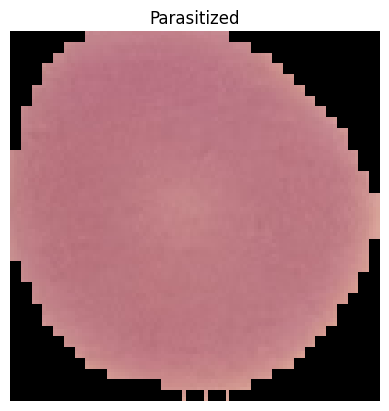

In [21]:
# 5. Display a sample image
for image, label in train_data.take(1):
    plt.imshow(image)
    plt.title("Parasitized" if label.numpy() == 1 else "Uninfected")
    plt.axis('off')
    plt.show()

In [22]:
# 6. Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0  # normalize to [0,1]
    return image, label

In [23]:
# 7. Apply preprocessing and batching
BATCH_SIZE = 32

train_data = train_data.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_data = val_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [25]:
# 8. Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [26]:
# 9. Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [27]:
# 10. Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 757s 1s/step - accuracy: 0.6814 - loss: 0.5643 - val_accuracy: 0.9381 - val_loss: 0.1856
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 725s 1s/step - accuracy: 0.9438 - loss: 0.1619 - val_accuracy: 0.9465 - val_loss: 0.2002
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 762s 1s/step - accuracy: 0.9557 - loss: 0.1303 - val_accuracy: 0.9505 - val_loss: 0.1591
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 733s 1s/step - accuracy: 0.9646 - loss: 0.1053 - val_accuracy: 0.9534 - val_loss: 0.1479
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 745s 1s/step - accuracy: 0.9717 - loss: 0.0838 - val_accuracy: 0.9423 - val_loss: 0.1926


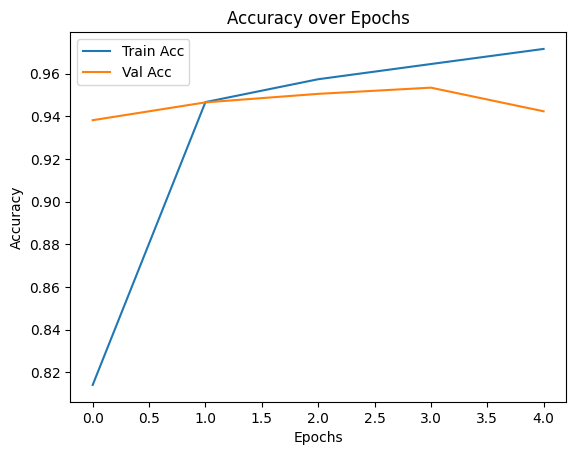

In [28]:
# 11. Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()